In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

import statsmodels.api as sm

import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

%matplotlib inline

In [2]:
adata = pd.read_csv('amzn_data.csv')

In [3]:
adata.head()

,date,4. close,2. high,1. open,3. low,5. volume
0,1999-08-30,119.250,130.0000,127.563,117.875,18494400.0
1,1999-08-31,124.375,124.6880,118.375,112.188,32792400.0
2,1999-09-01,119.063,127.0022,127.000,117.500,21961600.0
3,1999-09-02,60.063,61.9380,57.500,57.375,16838700.0
4,1999-09-03,62.438,64.0000,63.625,60.625,16435900.0


In [4]:
adata.shape

(5031, 6)

In [7]:
adata.isnull().any()

date         False
4. close     False
2. high      False
1. open      False
3. low       False
5. volume    False
dtype: bool

In [9]:
cols = ['2. high','1. open','3. low','5. volume']
adata.drop(cols,inplace=True,axis=1)

In [10]:
from datetime import datetime

def convert(x):
    return datetime.strptime(x,"%Y-%m-%d")


adata['date'] = adata['date'].apply(convert)

In [11]:
adata.head()
adata.rename(mapper={"4. close":"close"},axis=1,inplace=True)

In [13]:
adata = adata.set_index('date')
adata.index

DatetimeIndex(['1999-08-30', '1999-08-31', '1999-09-01', '1999-09-02',
               '1999-09-03', '1999-09-07', '1999-09-08', '1999-09-09',
               '1999-09-10', '1999-09-13',
               ...
               '2019-08-14', '2019-08-15', '2019-08-16', '2019-08-19',
               '2019-08-20', '2019-08-21', '2019-08-22', '2019-08-23',
               '2019-08-26', '2019-08-27'],
              dtype='datetime64[ns]', name='date', length=5031, freq=None)

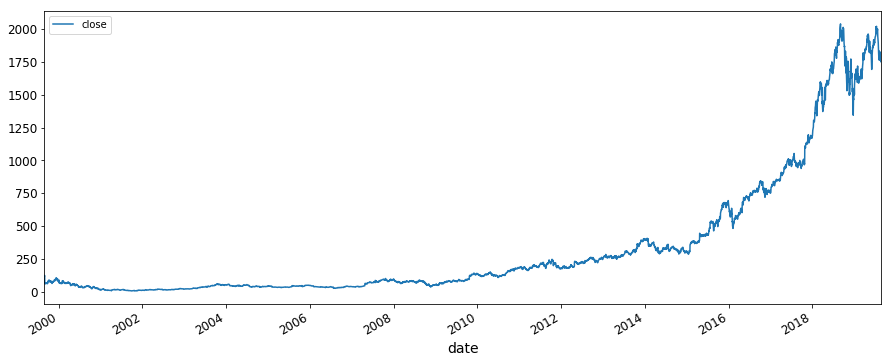

In [14]:
adata.plot(figsize=(15, 6))

In [15]:
adata = adata.asfreq('D')

In [16]:
adata.shape

(7303, 1)

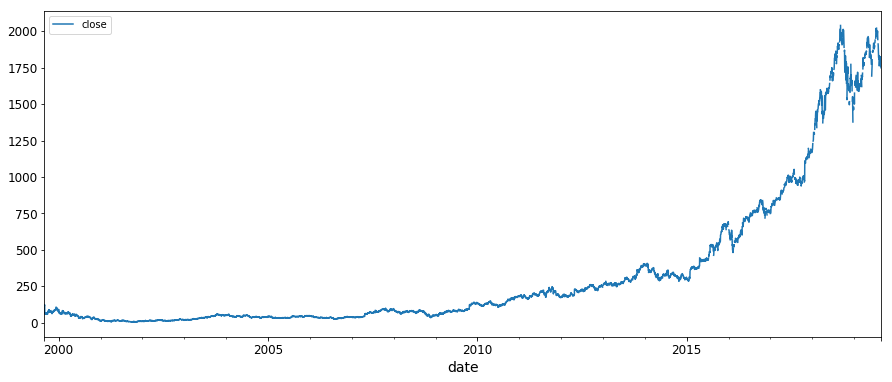

In [17]:
adata.plot(figsize=(15, 6))

In [18]:
# linear interpolation
adata['close'] = adata['close'].interpolate()

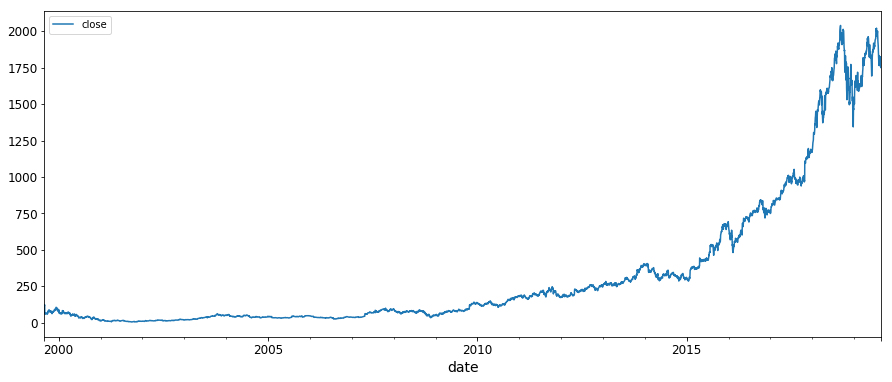

In [19]:
adata.plot(figsize=(15, 6))

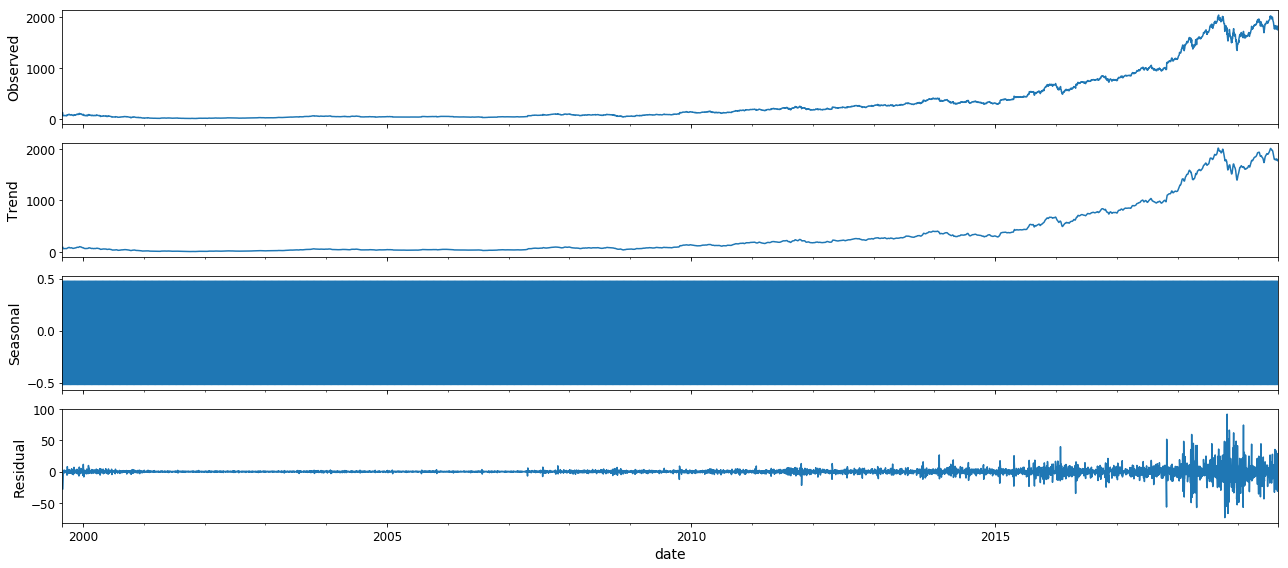

In [22]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(adata, model='additive')
fig = decomposition.plot()
plt.show()

In [23]:
import itertools
p = q = d = range(2)
pqd = list(itertools.product(p,q,d))
seasonal_pqd = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [24]:
for param in pqd:
    for sea_param in seasonal_pqd:
        try:
            model = sm.tsa.statespace.SARIMAX(adata,order=param,seasonal_order=sea_param,enforce_invertibility=False,
                                      enforce_stationarity=False)
            res = model.fit()
            
            print('SARIMA{}x{}12 - AIC:{}'.format(param, sea_param, res.aic))
        except:
            continue

/home/sukhad/env/lib/python3.5/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:113791.75607963369
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:104278.95866882117
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:70469.07133264888
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:70306.69511380674


/home/sukhad/env/lib/python3.5/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:70373.06707615794
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:70273.1238967586
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:70308.70751257529
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:70285.00740567657
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:103802.08688719537
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:94454.32439833286
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:63782.33454532454
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:63412.547235002785


/home/sukhad/env/lib/python3.5/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:70703.25202000113


/home/sukhad/env/lib/python3.5/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:63939.86020675294
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:63402.653409365776
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:63380.77704621012
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:51746.74540639272
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:51605.35893844893
SARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:57053.382574720046
SARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:51610.572315508434
SARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:51609.63346626953
SARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:51600.481570048956
SARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:54364.297534419275
SARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:51567.82317706804
SARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:51729.784339315425
SARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:51588.38434920217
SARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:57039.55807051263
SARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:51594.07359190808
SARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:51598.77195665817
SARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:51583.75494783955
SARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:5436

/home/sukhad/env/lib/python3.5/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:51654.645529452326
SARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:56765.51779133681
SARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:51618.451337466104
SARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:51600.38388917053
SARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:51597.71507882978
SARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:54195.88908772901
SARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:51576.13152093229
SARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:51729.94204309855


/home/sukhad/env/lib/python3.5/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:51640.80271966185
SARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:56720.89782486377
SARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:51602.14379201326
SARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:51602.15372295168
SARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:51582.19740452395
SARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:54180.6469639187
SARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:51558.76615655782
SARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:51736.00662249048
SARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:51594.20036059589
SARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:57045.99007513562
SARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:51600.344321982826
SARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:51592.41892233917
SARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:51589.80160249113
SARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:54355.10347009645
SARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:51557.09450804459
SARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:51727.74596163764
SARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:51587.988647869424
SARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:56758.260

In [25]:
mod = sm.tsa.SARIMAX(adata,order=(1,1,1),seasonal_order=(1,1,1,12),enforce_invertibility=False,enforce_stationarity=False)

res = mod.fit()

In [26]:
res.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,-0.7648,0.030,-25.352,0.000,-0.824,-0.706
ma.L1,0.7950,0.029,27.626,0.000,0.739,0.851
ar.S.L12,-0.0620,0.003,-18.138,0.000,-0.069,-0.055
ma.S.L12,-1.0081,0.001,-1203.222,0.000,-1.010,-1.007
sigma2,68.2245,0.231,295.056,0.000,67.771,68.678


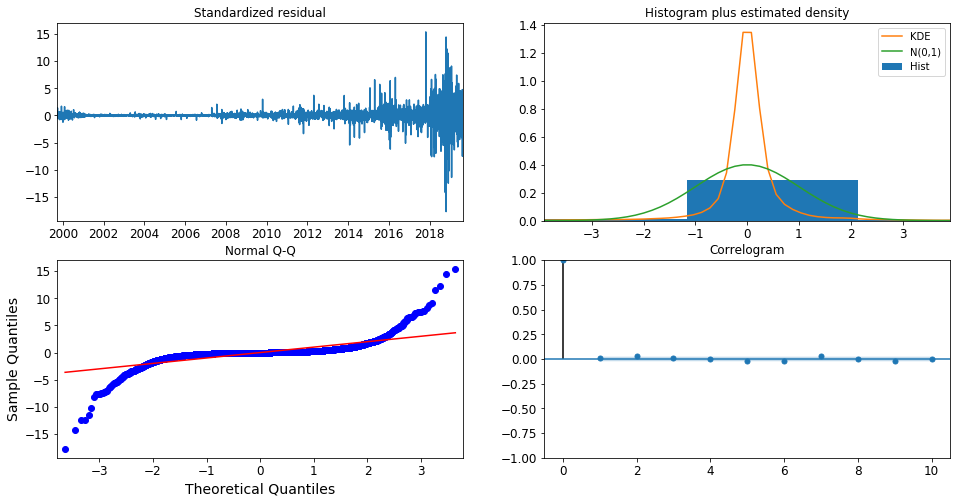

In [27]:
res.plot_diagnostics(figsize=(16, 8))
plt.show()

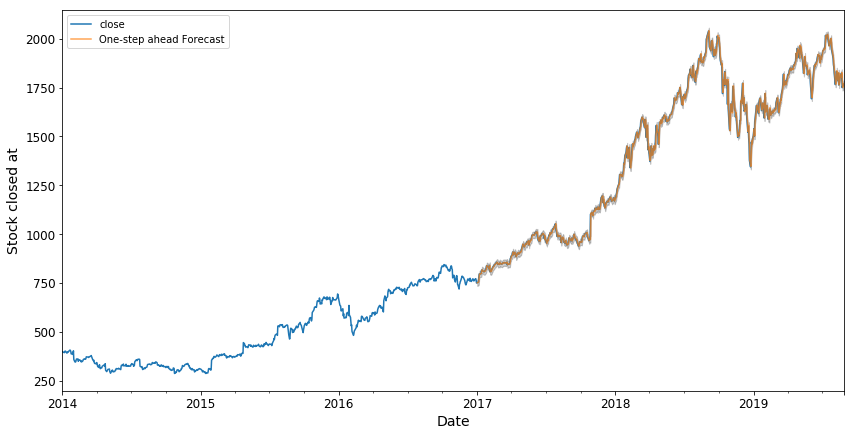

In [28]:
preds = res.get_prediction(start=pd.to_datetime('2017-01-01'),dynamic=False)
pred_ci = preds.conf_int()

ax = adata['2014':].plot(label='observed')
preds.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Stock closed at')
plt.legend()
plt.show()

In [29]:
res.save('amzn_sarima.pkl')

In [38]:
import time

st = time.time()

y_pred = res.get_prediction(start=pd.to_datetime('2017-01-01'),dynamic=False)
y_true = adata[pd.to_datetime('2017-01-01'):]

et = time.time()

print(et-st)

0.004558563232421875


In [39]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_pred.predicted_mean,y_true)

427.2175615628847

In [42]:
y_pred = res.get_prediction(end=pd.to_datetime('2019-09-06'),dynamic=False)

/home/sukhad/env/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


In [43]:
y_pred.predicted_mean

1999-08-30       0.000000
1999-08-31      88.849608
1999-09-01     131.824214
1999-09-02     118.954926
1999-09-03      85.895564
1999-09-04      52.936274
1999-09-05      65.621465
1999-09-06      61.631289
1999-09-07      63.104574
1999-09-08      62.787826
1999-09-09      62.142932
1999-09-10      62.437986
1999-09-11     139.457762
1999-09-12     110.644528
1999-09-13      63.542712
1999-09-14       2.371872
1999-09-15      46.805622
1999-09-16      68.568818
1999-09-17      64.372642
1999-09-18      65.245933
1999-09-19      63.077708
1999-09-20      62.231231
1999-09-21      64.332317
1999-09-22      65.680127
1999-09-23      65.703977
1999-09-24      62.290904
1999-09-25      62.489024
1999-09-26      60.733959
1999-09-27      62.320903
1999-09-28      62.505351
                 ...     
2019-08-08    1796.728407
2019-08-09    1835.620909
2019-08-10    1808.133099
2019-08-11    1801.493249
2019-08-12    1794.507223
2019-08-13    1784.750447
2019-08-14    1825.468465
2019-08-15  